#Intro

This is the third practical homework for the ML seminar. It contains three parts:

  1. Training a decision tree and a kNN on the MNIST dataset from the previous assignments and commenting on the overfitting or underfitting problems if necessary.

  2. Visualizing the decision boundaries in 2 dimensions using a new dataset and the classification algorithms we have learnt so far.

  3. Running the logistic regression training algorithm on a bidimensional (i.e. with two input columns) linearly separable dataset. Use the gradient ascent or the Newton metod. What do you notice? You can implement the algorithm or you can use the implementation from the [notebook](https://colab.research.google.com/drive/1fGqy2cIvqcwBRNV9mPYkgN5b_2S2Te95?usp=sharing).

# Part 1


##1.

Obtain the data from the previous homework.

In [1]:
# Data is at: https://docs.google.com/uc?export=download&id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0
# Save the cookies needed for download:
!wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://drive.usercontent.google.com/download?id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0&export=download" -O-
# Load the cookies & download the .zip file:
!wget --load-cookies /tmp/cookies.txt "https://drive.usercontent.google.com/download?id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0&export=download&confirm=t" -O mnist_Xy.zip
# Clean up temporary cookies:
!rm /tmp/cookies.txt

<!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv="content-type" content="text/html; charset=utf-8"/><style nonce="KPgLbxv4o8oSmf1gOj1N4w">.goog-link-button{position:relative;color:#15c;text-decoration:underline;cursor:pointer}.goog-link-button-disabled{color:#ccc;text-decoration:none;cursor:default}body{color:#222;font:normal 13px/1.4 arial,sans-serif;margin:0}.grecaptcha-badge{visibility:hidden}.uc-main{padding-top:50px;text-align:center}#uc-dl-icon{display:inline-block;margin-top:16px;padding-right:1em;vertical-align:top}#uc-text{display:inline-block;max-width:68ex;text-align:left}.uc-error-caption,.uc-warning-caption{color:#222;font-size:16px}#uc-download-link{text-decoration:none}.uc-name-size a{color:#15c;text-decoration:none}.uc-name-size a:visited{color:#61c;text-decoration:none}.uc-name-size a:active{color:#d14836;text-decoration:none}.uc-footer{color:#777;font-size:11px;padding-bottom:5ex;padding-top:5ex;text-align:center}.uc-footer a

In [2]:
!unzip mnist_Xy.zip

Archive:  mnist_Xy.zip
  inflating: mnist_X.npy             
  inflating: mnist_y.npy             


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
X = np.load("mnist_X.npy")
y = np.load("mnist_y.npy")

##2.

### a.

Split the dataset in (train, validation, test) using the following percentages: 60%, 20%, 20%, as you already did in the previous homework.

In [8]:
import sklearn
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### b.
Preprocess the obtained datasets as we did in the previous hoemwork.

In [9]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

## 3.


### a.
Train a decision tree on the train set.

In [10]:
import sklearn.tree as tree
id3_tree =tree.DecisionTreeClassifier(criterion="entropy")
id3_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

###  b.
Compute the training and validation accuracy.


In [11]:
# here we compute accuracy

print("training score:" , id3_tree.score(X_train,y_train))
print("validation score:" , id3_tree.score(X_val,y_val))

training score: 1.0
validation score: 0.8645333333333334


###  c.
Do you encounter overfitting or underfitting? If yes, fix somehow the problem. If no, imagine that you had overfitting/underfitting and explain in words how you would fix this.


WRITE YOUR TEXT ANSWER HERE

In [28]:
# we using  pruning methode, to limit the depth of the tree( in this model avoid to learn noises)
id3_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=12)  # Limit depth to 5
id3_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [29]:
# here we compute accuracy

print("training score:" , id3_tree.score(X_train,y_train))
print("validation score:" , id3_tree.score(X_val,y_val))

training score: 0.9738412698412698
validation score: 0.8656


## 4.

### a.
Train a kNN with k=1 (i.e. a 1NN) on the train set.

In [32]:
import sklearn.neighbors as neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

###  b.
Compute ONLY the validation accuracy (because it already takes a lost of time, i.e. almost 20 minutes). Knowing that the dataset is consistent, what is the training accuracy (without running any code)?

In [33]:
print("validation score:" , id3_tree.score(X_val,y_val))
# the training accuracy is 1.0 if dataset is consistent.

validation score: 0.8656




```
# This is formatted as code

 the training accuracy on training is 1.0 if dataset is consistent.


```

WRITE YOUR TEXT ANSWER HERE

###c.
Why does it take such a long time for kNN to predict labels of new instances?

WRITE YOUR TEXT ANSWER HERE



```
# This is formatted as code
```
In 1-NN the training accuracy is 100% because each training instance is its own nearest neighbor. During training the model essentially memorizes the entire training dataset by storing all data points.

###  d.
Do you encounter overfitting or underfitting?

WRITE YOUR TEXT ANSWER HERE

Yes ,we encounter overfitting , because accuracy at training is 1.0 ,and at validation is around 0.8. That is a clear sign of overfitting.

###  e.
Imagine that you have overfitting/underfitting (and enough time to wait) and explain in words how you will fix this.


WRITE YOUR TEXT ANSWER HERE

If we were experiencing overfitting, we could try to mitigate it by iteratively increasing the value of 'k' and retraining the k-NN model. We would continue this process, evaluating the model's performance on the validation set each time, until we find a value of 'k' that minimizes the validation error without being excessively large. At this point, where we achieve the best validation accuracy with a reasonable 'k' value, we would select that model as our final choice.

# Part 2: Decision Boundaries in 2D

Source: The following were taken from [here](https://www.coursera.org/learn/neural-networks-deep-learning/notebook/NI888/planar-data-classification-with-a-hidden-layer)

## 1 - Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis.
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- planar_utils provide various useful functions used in this assignment

In [34]:
!wget https://raw.githubusercontent.com/aciobanusebi/ml2/master/planar_utils_modified.py
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils_modified import plot_decision_boundary, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

--2024-12-06 15:57:35--  https://raw.githubusercontent.com/aciobanusebi/ml2/master/planar_utils_modified.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2251 (2.2K) [text/plain]
Saving to: ‘planar_utils_modified.py’

planar_utils_modifi 100%[===================>]   2.20K  --.-KB/s    in 0s      

2024-12-06 15:57:35 (32.7 MB/s) - ‘planar_utils_modified.py’ saved [2251/2251]



## 2 - Dataset ##

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables `X` and `y`.

In [35]:
X, y = load_planar_dataset()

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

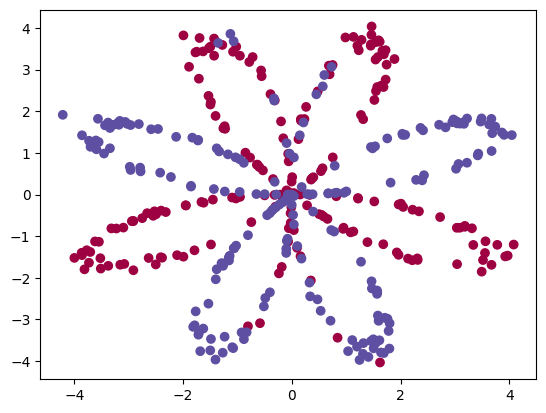

In [36]:
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

You have:
- a numpy-array (matrix) X that contains your features (x1, x2)
- a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like.

**Exercise**: How many training examples do you have? In addition, what is the `shape` of the variables `X` and `y`?

**Hint**: How do you get the shape of a numpy array? [(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [38]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X=X.shape
shape_y=y.shape
m=X.shape[0]
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of y is: ' + str(shape_y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (400, 2)
The shape of y is: (400,)
I have m = 400 training examples!


**Expected result**:

<table>

  <tr>
    <td><b>shape of X</b></td>
    <td> (400,2) </td>
  </tr>
  
  <tr>
    <td><b>shape of y</b></td>
    <td>(400,) </td>
  </tr>
  
  <tr>
    <td><b>m</b></td>
    <td> 400 </td>
  </tr>
  
</table>

## 3 - Simple Logistic Regression

Let's first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [39]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

You can now plot the decision boundary of the model. Run the code below.

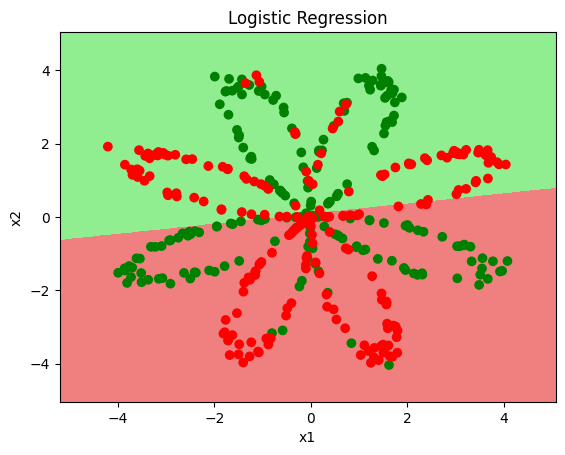

In [40]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, y)
plt.title("Logistic Regression")
plt.show()

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well.

<b>Exercise</b>: Using models from sklearn, plot the decision boundaries for the following:

- a decision tree
  - what type of decision boundary you see

- Gaussian Naive Bayes
  - what type of decision boundary you see

- kNN: 1NN, 11NN, 51NN, 201NN;
    - what type of decision boundary you see
    - specify if the decision boundary becomes smoother or not as k increases
    - specify if the time at inference increases or not as k increases

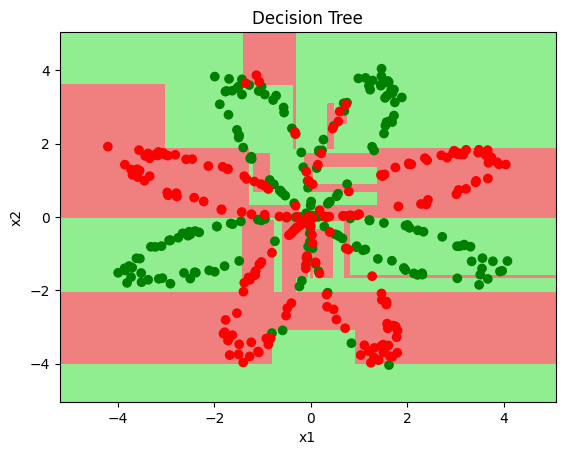

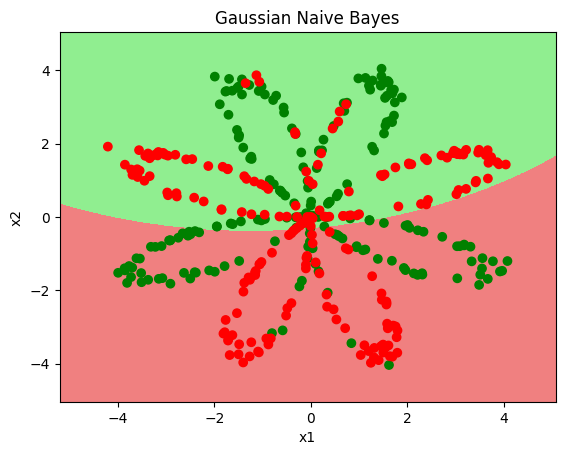

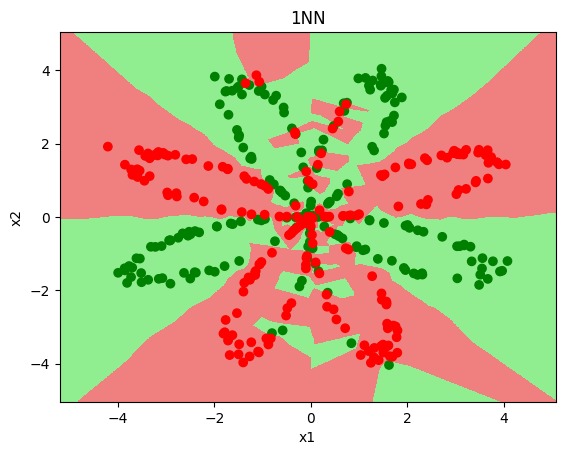

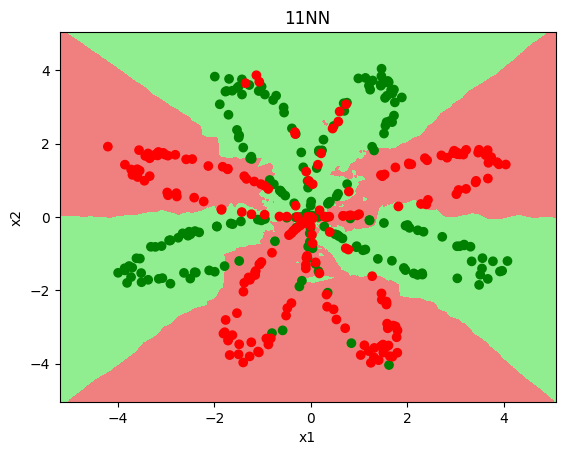

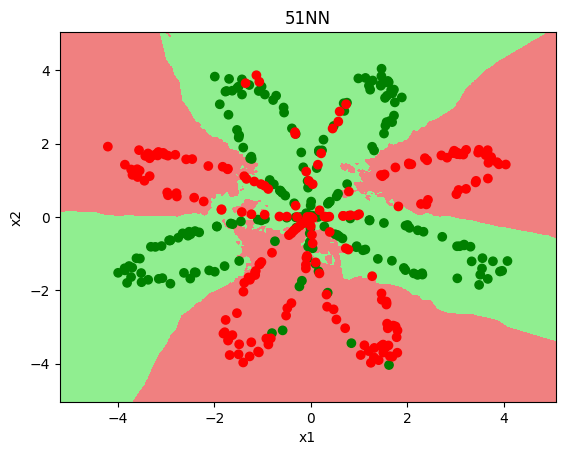

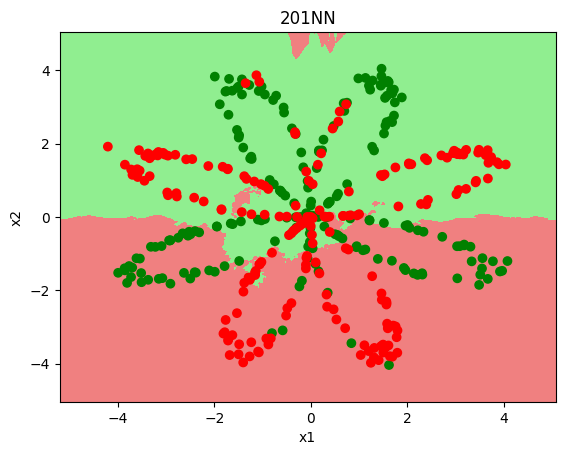

In [44]:

import sklearn.naive_bayes as nb
import sklearn.neighbors as neighbors

id3 = tree.DecisionTreeClassifier(criterion="entropy")
id3.fit(X, y)
BG = nb.GaussianNB()
BG.fit(X, y)
knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, y)
knn11 = neighbors.KNeighborsClassifier(n_neighbors=11)
knn11.fit(X, y)
knn51 = neighbors.KNeighborsClassifier(n_neighbors=51)
knn51.fit(X, y)
knn201 = neighbors.KNeighborsClassifier(n_neighbors=201)
knn201.fit(X, y)




plot_decision_boundary(lambda x: id3.predict(x), X, y)
plt.title("Decision Tree")
plt.show()
plot_decision_boundary(lambda x: BG.predict(x), X, y)
plt.title("Gaussian Naive Bayes")
plt.show()
plot_decision_boundary(lambda x: knn1.predict(x), X, y)
plt.title("1NN")
plt.show()
plot_decision_boundary(lambda x: knn11.predict(x), X, y)
plt.title("11NN")
plt.show()
plot_decision_boundary(lambda x: knn51.predict(x), X, y)
plt.title("51NN")
plt.show()
plot_decision_boundary(lambda x: knn201.predict(x), X, y)
plt.title("201NN")
plt.show()


WRITE YOUR TEXT ANSWER HERE

# Part 3

Run the logistic regression training algorithm on a bidimensional (i.e. with two input columns) linearly separable dataset. Use the gradient ascent or the Newton metod. What do you notice? You can implement the algorithm or you can use the implementation from the [notebook](https://colab.research.google.com/drive/1fGqy2cIvqcwBRNV9mPYkgN5b_2S2Te95?usp=sharing).

In [45]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [2,2]
])
y = np.array([[1],[0],[0],[1]])

X_with_extra_col = np.concatenate((np.ones((len(X),1)),X),axis=1)

def get_y_pred(x):
  return sigmoid(X_with_extra_col @ x)
def f(x):
  y_pred = get_y_pred(x)
  return np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
def f_gradient(x):
  y_pred = get_y_pred(x)
  return X_with_extra_col.T @ (y - y_pred)
def f_hessian(x):
  y_pred = get_y_pred(x)
  return -X_with_extra_col.T @ np.diag((y_pred * (1-y_pred)).squeeze()) @ X_with_extra_col

In [50]:
x = np.zeros((3, 1))  # Initialize with zeros

# Newton method iterations
for i in range(1000):  # Adjust the number of iterations as needed
    gradient = f_gradient(x)
    hessian = f_hessian(x)
    x = x - np.linalg.solve(hessian, gradient)  # Update parameters


# Print the final parameters
print("Final parameters (w0, w1, w2):", x.flatten())


Final parameters (w0, w1, w2): [-0.70446605  0.48809844  0.48809844]
